In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from bs4 import BeautifulSoup
import urllib.request

In [20]:
from google.colab import files
uploaded = files.upload()

Saving iphone12reviews.csv to iphone12reviews.csv


In [21]:
import io
iphonereviews = pd.read_csv(io.BytesIO(uploaded['iphone12reviews.csv']))

In [22]:
iphonereviews.head()

,Unnamed: 0,date_info,name,title,content,rating
0,0,Reviewed in India on 24 December 2020,Ayush taliyan,NOW I ONLY HAVE ONE KIDNEY,My girlfriend demanded me this iphone... And n...,1.0 out of 5 stars
1,1,Reviewed in India on 7 November 2020,Tarun barath,Worst battery,Worst battery performance.. Iphone 11 is far b...,3.0 out of 5 stars
2,2,Reviewed in India on 7 November 2020,S.Siva Ram Kris,"Another Fabulous IPhone ( IPhone 12, Blue 64GB)",Another beauty from Apple. I was upgraded from...,5.0 out of 5 stars
3,3,Reviewed in India on 21 November 2020,Amazon Customer,Kidney as a load balancer,"Sold kidney bought this, now not feeling well ...",4.0 out of 5 stars
4,4,Reviewed in India on 13 November 2020,Paras,The Beast,This was my first switch to an ios device afte...,5.0 out of 5 stars


In [23]:
reviews=iphonereviews.content

In [24]:
reviews=pd.DataFrame(reviews)

In [26]:
reviews.shape

(752, 1)

In [27]:
from textblob import TextBlob

In [28]:
def analyze_sentiment(text):
  analysis=TextBlob(text)
  if analysis.polarity >0 :
    return 'Positive'
  elif analysis.polarity==0:
    return 'Neutral'
  else:
    return 'Negative'

In [29]:
reviews['sentiment']=[str(analyze_sentiment(x))
                          for x in reviews['content']]

In [30]:
reviews.head()

,content,sentiment
0,My girlfriend demanded me this iphone... And n...,Negative
1,Worst battery performance.. Iphone 11 is far b...,Negative
2,Another beauty from Apple. I was upgraded from...,Positive
3,"Sold kidney bought this, now not feeling well ...",Positive
4,This was my first switch to an ios device afte...,Positive


In [31]:
reviews.sentiment.value_counts()

Positive    577
Neutral      88
Negative     87
Name: sentiment, dtype: int64

In [32]:
# NATURAL LANGUAGE PROCESSING 
# SENTIMENT ANALYSIS IS DONE ON SENTENCES
# WORD ANALYSIS - BREAK SENTENCES INTO WORDS & USE WORDS AS INPUT AND PERFORM FREQUENCY
# ANALYSIS, WORDCLOUD
# TERM FREQUENCY INVERSE DOCUMENT FREQUENCY (TFIDF) - CONVERT LIST OF WORDS INTO MATRIX
# WORDS ON COLUMNS AND FREQUENCUES WILL BE THERE IN CELLS
# TFIDF MATRIX IS A SPARSE MATRIX MEANS IT HAS MANY ZEROS

In [33]:
from wordcloud import WordCloud,STOPWORDS

In [34]:
review_words=''
stopwords=set(STOPWORDS)
for val in reviews.content:
  val=str(val)
  tokens=val.split()
  for i in range(len(tokens)):
    tokens[i]=tokens[i].lower()
  review_words +=" ".join(tokens)+" "

In [37]:
wordcloud=WordCloud(width=800,height=800,background_color='white',stopwords=stopwords,
                    min_font_size=10).generate(review_words)

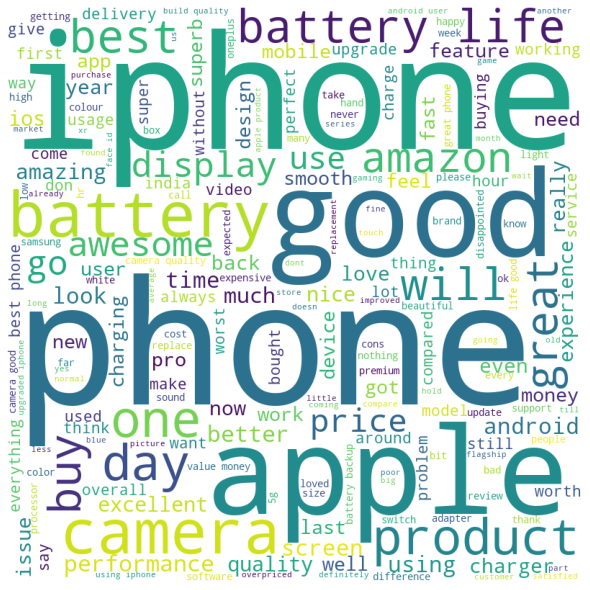

In [38]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [39]:
# TERM FREQUENCT INVERSE DOCUMENT FREQUENCY (TFIDF MATRIX)
# TERM FREQUENCY - HOW MANY TIMES WORD IS APPEARING IN REVIEW/TWEET/DOCUMENTS
# INVERSE DOCUMENT FREQUENCY - HOW COMMON/FREQUENT THE WORD IS APPEARING ACROSS DIFFERENT
# REVIEWS/TWEETS/DOCUMENTS.
# TF = NUMBER OF TIMES WORD APPEEARED IN REVIEW/LENGTH OF REVIEW
# IDF = LOG(NUM OF REVIEWS IN CORPUS/NUMBER OF REVIEWS WITH THE WORD)
# TFIDF= TF * IDF

In [40]:
# REVIEW 1 - I READ THE SVM ALGORITHM ARTICLE IN DATAASPIRANT BLOG
# REVIEW 2 - I READ THE RANDOM FOREST ALGORITHM ARTICLE IN DATAASPIRANT BLOG
# PREPROCESSING - REMOVE STOPWORDS AND LOWER CASE
# Review 1 - read svm algorithm article dataaspirant blog
# review 2 - read random forest algorithm article dataaspirant blog

# TFIDF for word "algorithm"
# TF in review 1 = 1/6 = 0.17
# TF in review 2 = 1/7 = 0.14

# IDF of "algorithm" = log(2/2)=0
# TFIDF for "algorithm" = 0.17*0 =0  TFIDF for "algorithm" = 0.14*0=0

# TFIDF for word "svm"
# TF in review 1 = 1/6 =0.17
# TF in review 2 = 0/7=0
# IDF of "svm" = log(2/1)= 0.30
# TFIDF for review 1 = 0.17 * 0.30 = 0.051
# TFIDF for review 2 = 0.14 * 0 = 0

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
tfidf=TfidfVectorizer(analyzer='word',ngram_range=(1,3),min_df=0,
                      stop_words='english',max_features=100)

In [43]:
tfidfmatrix=tfidf.fit_transform(reviews.content)

In [44]:
tfidfmatrix.shape

(752, 100)

In [45]:
df1=pd.DataFrame(tfidfmatrix.toarray(),columns=tfidf.get_feature_names())

In [46]:
tfidfdf=pd.concat([df1,reviews.sentiment],axis=1)

In [47]:
tfidfdf.to_csv('tfidf.csv')

In [48]:
y=tfidfdf.sentiment
X=tfidfdf.drop('sentiment',axis=1)

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le=LabelEncoder()

In [51]:
y=le.fit_transform(y)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logistic=LogisticRegression(multi_class='multinomial')

In [54]:
logisticmodel=logistic.fit(X,y)

In [55]:
logisticmodel.score(X,y)

0.8218085106382979